# **Match Song Lyrics to Artists**

- Author: Beyza Balota - 31232
- Date: 14.11.2024

### 1. Data Loading and Concatenation  (hint: use zipfile library for loading the zip file and concatenate the csv files)

Use pandas library to read your dataset into df object below.

In [1]:
#####
#Download the lyrics from the link into your folder and read it with zip file
#Assign the file contents into df object that is from pandas library.

import pandas as pd
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/Users/beyzabalota/Desktop/fall 4.1/cs445/hw2/archive.zip'

# Initialize an empty list to store dataframes
df_list = []

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Loop through each file in the zip file
    for file in z.namelist():
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            # Read the CSV file and append it to the list
            with z.open(file) as f:
                df = pd.read_csv(f, encoding='ISO-8859-1')
                df_list.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

# Display the first few rows of the dataframe and its length
#print(df.head())
#print(f"Total number of records: {len(df)}")


/var/folders/g5/ns837z7j0sdchmqlxf4w09480000gn/T/ipykernel_22569/3800482634.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


In [2]:
df.head() 

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0.0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1.0,Dua Lipa,Donât Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2.0,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3.0,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4.0,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...


In [3]:
len(df)

6027

### 2. Data Cleaning (Look at value count of each lyric and remove unnecessary or empty lyrics after this process view length of the dataframe to see the change)

In [4]:
#### WRITE YOUR CODE HERE
# Check the initial length of the DataFrame
initial_length = len(df)
print(f"Initial number of records: {initial_length}")

# Drop rows with empty or NaN lyrics
df = df.dropna(subset=['Lyric'])  # Remove rows where 'Lyric' is NaN
df = df[df['Lyric'].str.strip() != '']  # Remove rows where 'Lyric' is an empty string

# Check the new length of the DataFrame
new_length = len(df)
print(f"Number of records after cleaning: {new_length}")

# Show the difference in the number of records
print(f"Number of records removed: {initial_length - new_length}")


Initial number of records: 6027
Number of records after cleaning: 5981
Number of records removed: 46


### 3. Exploratory Data Analysis (EDA) - Artist Histogram (Create a histogram for the number of lyrics of each artist using matplotlib)

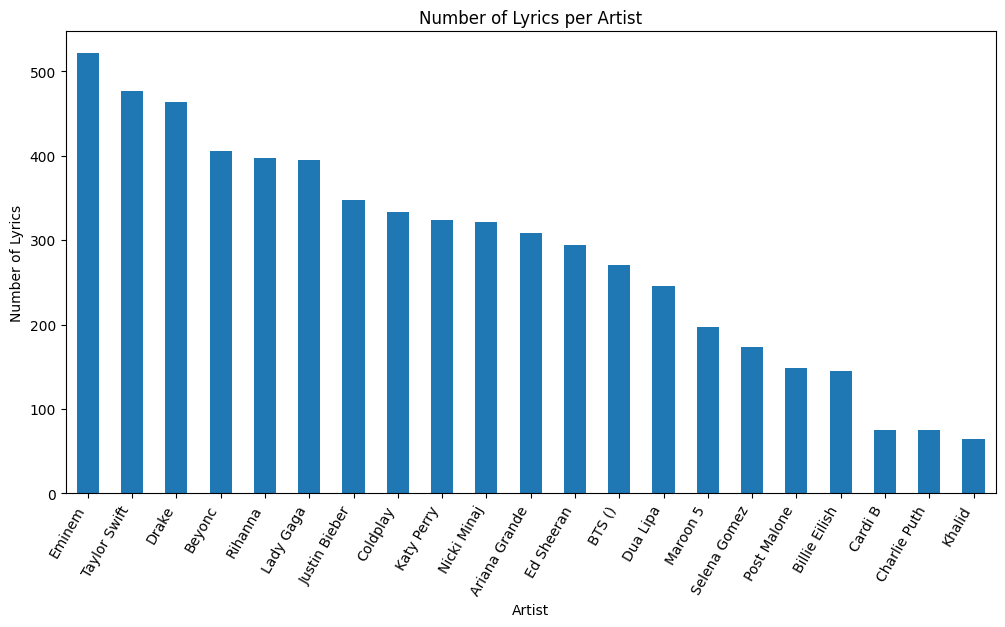

In [5]:
#### WRITE YOUR CODE HERE
import matplotlib.pyplot as plt
import re

# Clean up artist names by removing non-ASCII characters
df['Artist'] = df['Artist'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))


# Count the number of lyrics for each artist
artist_counts = df['Artist'].value_counts()

# Plot the histogram
plt.figure(figsize=(12, 6))
artist_counts.plot(kind='bar')
plt.title('Number of Lyrics per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Lyrics')
plt.xticks(rotation=60, ha='right') 
plt.show()


### 4. Preprocessing Function (Create a preprocess function for the lyrics)

In [6]:
###Add your libraries here
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK data files if necessary
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_data(data):

  #### WRITE YOUR CODE HERE

    # Initialize tools
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    # Define a function to preprocess each lyric
    def clean_lyric(text):
        # Convert to lowercase
        text = text.lower()
        
        # Remove punctuation and special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Tokenize
        words = word_tokenize(text)
        
        # Remove stopwords and apply stemming
        words = [stemmer.stem(word) for word in words if word not in stop_words]
        
        # Join words back into a single string
        return ' '.join(words)
    
    # Apply the preprocessing function to the 'Lyric' column
    data['Lyric'] = data['Lyric'].apply(clean_lyric)
    
    return data
    

# Apply the preprocessing function to the DataFrame
df = preprocess_data(df)

# Display the first few rows to verify preprocessing
display(df)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beyzabalota/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beyzabalota/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0.0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin sleep night makin c...
1,1.0,Dua Lipa,Donât Start Now,Future Nostalgia,2019.0,2019-11-01,dont wan na see full crazi think bout way hear...
2,2.0,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,call friendli tellin much miss that funni gues...
3,3.0,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,know hot know weve got someth money cant buy f...
4,4.0,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,see moon see moon see moon oh your look sun im...
...,...,...,...,...,...,...,...
6022,59.0,Khalid,Khalid - Vertigo (TraduÃ§Ã£o PortuguÃªs),NaN,2018.0,2018-10-28,ser que melhor apena acreditar na teoria que i...
6023,60.0,Khalid,Better (Miles Away Remix),NaN,2018.0,2018-12-12,im realli drunk never get fuck im im sober lov...
6024,61.0,Khalid,Khalid - Better (Official Music Video),NaN,2018.0,2018-05-07,user consid viru malwar must know virus fact c...
6025,62.0,Khalid,Perfect Lover,NaN,NaN,NaN,lyric song yet releas pleas check back song re...


#### Train Dev Test split
Separate the song lyrics (documents) with respective artist names (labels). Split the dataset into train/dev/test datasets with 0.70/0.15/0.15 proportions.

In [7]:
#### WRITE YOUR CODE HERE
from sklearn.model_selection import train_test_split

# First, split the data into 70% train and 30% temporary (which will be further split into dev and test)
train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)

# Now split the temporary data into 50% dev and 50% test (which is 15% of the original data each)
dev_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the lengths to verify the proportions
print(f"Training set: {len(train_data)}")
print(f"Development set: {len(dev_data)}")
print(f"Test set: {len(test_data)}")

Training set: 4186
Development set: 897
Test set: 898


### 5. Implement a Naive Bayes classifier with Bag-of-Words features **from** scratch. You are not allowed to use external libraries for training a NB classifier.

In [8]:
#### WRITE YOUR NAIVE BAYES CODE HERE

import numpy as np
import math
from collections import defaultdict, Counter

class NaiveBayesClassifier:
    def __init__(self):
        self.artist_word_counts = defaultdict(Counter)
        self.artist_counts = Counter()
        self.vocabulary = set()
        self.artist_priors = {}
        self.word_likelihoods = {}

    def fit(self, X, y):
        # X: list of lyrics
        # y: list of corresponding artists
        
        # Count words and documents per artist
        for lyric, artist in zip(X, y):
            words = lyric.split()
            self.artist_counts[artist] += 1
            self.artist_word_counts[artist].update(words)
            self.vocabulary.update(words)
        
        # Calculate prior probabilities for each artist
        total_docs = sum(self.artist_counts.values())
        self.artist_priors = {artist: count / total_docs for artist, count in self.artist_counts.items()}
        
        # Calculate likelihoods for each word given the artist
        self.word_likelihoods = defaultdict(dict)
        vocab_size = len(self.vocabulary)
        for artist, word_counts in self.artist_word_counts.items():
            total_words = sum(word_counts.values())
            for word in self.vocabulary:
                # Laplace smoothing
                self.word_likelihoods[artist][word] = (word_counts[word] + 1) / (total_words + vocab_size)

    def predict(self, X):
        # Predict the artist for each lyric in X
        predictions = []
        for lyric in X:
            words = lyric.split()
            artist_scores = {}
            for artist in self.artist_counts:
                # Start with the log prior probability of the artist
                log_prob = math.log(self.artist_priors[artist])
                for word in words:
                    if word in self.vocabulary:  # Only consider words in the vocabulary
                        log_prob += math.log(self.word_likelihoods[artist].get(word, 1 / (sum(self.artist_word_counts[artist].values()) + len(self.vocabulary))))
                artist_scores[artist] = log_prob
            
            # Choose the artist with the highest score
            predictions.append(max(artist_scores, key=artist_scores.get))
        
        return predictions

# Example usage
# Prepare training data
X_train = train_data['Lyric'].tolist()  # List of lyrics
y_train = train_data['Artist'].tolist()  # List of artists

# Initialize and train the classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

# Predict on development or test set
X_dev = dev_data['Lyric'].tolist()
y_dev_pred = nb_classifier.predict(X_dev)

# Now, `y_dev_pred` contains the predicted artists for the dev set



### 6. Feature Selection and Engineering for other two classification methods - Select your features and convert your data with respect to these features. For example, if you will use numerical representation, use appropriate methods to transform your data to vectors.

In [9]:
#### WRITE YOUR CODE HERE

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF with word unigrams and bigrams
tfidf_word_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams
X_train_tfidf_word = tfidf_word_vectorizer.fit_transform(train_data['Lyric'])
X_dev_tfidf_word = tfidf_word_vectorizer.transform(dev_data['Lyric'])
X_test_tfidf_word = tfidf_word_vectorizer.transform(test_data['Lyric'])

# Character-level bigrams and trigrams
char_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))  # Character bigrams and trigrams
X_train_char = char_vectorizer.fit_transform(train_data['Lyric'])
X_dev_char = char_vectorizer.transform(dev_data['Lyric'])
X_test_char = char_vectorizer.transform(test_data['Lyric'])


### 7. Model Training and Evaluation
#### - Use several models to train on the dataset
#### - Use development dataset to see your system performances and optimize your system as you want.
#### - Lastly, evaluate your results with accuracy and F1 scores using test set.
#### - Report on the performance on the test set with comparison between methods and confusion matrices.

Evaluation on Test Set:
Naive Bayes - Accuracy: 0.5835, F1 Score: 0.5759
Classification Report:
                precision    recall  f1-score   support

Ariana Grande       0.64      0.47      0.54        58
       BTS ()       0.93      0.54      0.68        48
       Beyonc       0.51      0.67      0.58        54
Billie Eilish       0.93      0.45      0.60        29
      Cardi B       1.00      0.29      0.44        14
 Charlie Puth       0.00      0.00      0.00        14
     Coldplay       0.67      0.28      0.39        29
        Drake       0.53      0.92      0.67        65
     Dua Lipa       0.94      0.38      0.54        45
   Ed Sheeran       0.62      0.52      0.57        44
       Eminem       0.66      0.93      0.77        68
Justin Bieber       0.46      0.61      0.52        46
   Katy Perry       0.60      0.49      0.54        68
       Khalid       1.00      0.12      0.22         8
    Lady Gaga       0.83      0.57      0.67        60
     Maroon 5       0.

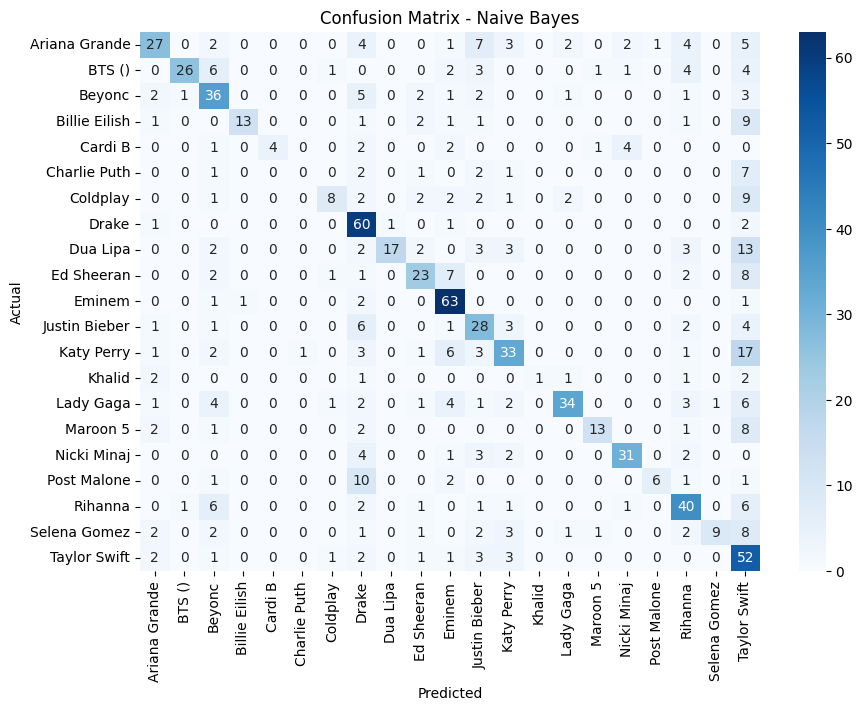

Logistic Regression - Accuracy: 0.6169, F1 Score: 0.6180
Classification Report:
                precision    recall  f1-score   support

Ariana Grande       0.78      0.50      0.61        58
       BTS ()       0.97      0.60      0.74        48
       Beyonc       0.64      0.67      0.65        54
Billie Eilish       1.00      0.48      0.65        29
      Cardi B       1.00      0.14      0.25        14
 Charlie Puth       0.00      0.00      0.00        14
     Coldplay       0.39      0.62      0.48        29
        Drake       0.57      0.83      0.68        65
     Dua Lipa       0.79      0.42      0.55        45
   Ed Sheeran       0.86      0.55      0.67        44
       Eminem       0.73      0.97      0.84        68
Justin Bieber       0.60      0.63      0.62        46
   Katy Perry       0.63      0.54      0.58        68
       Khalid       1.00      0.25      0.40         8
    Lady Gaga       0.68      0.65      0.67        60
     Maroon 5       0.94      0.56    

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


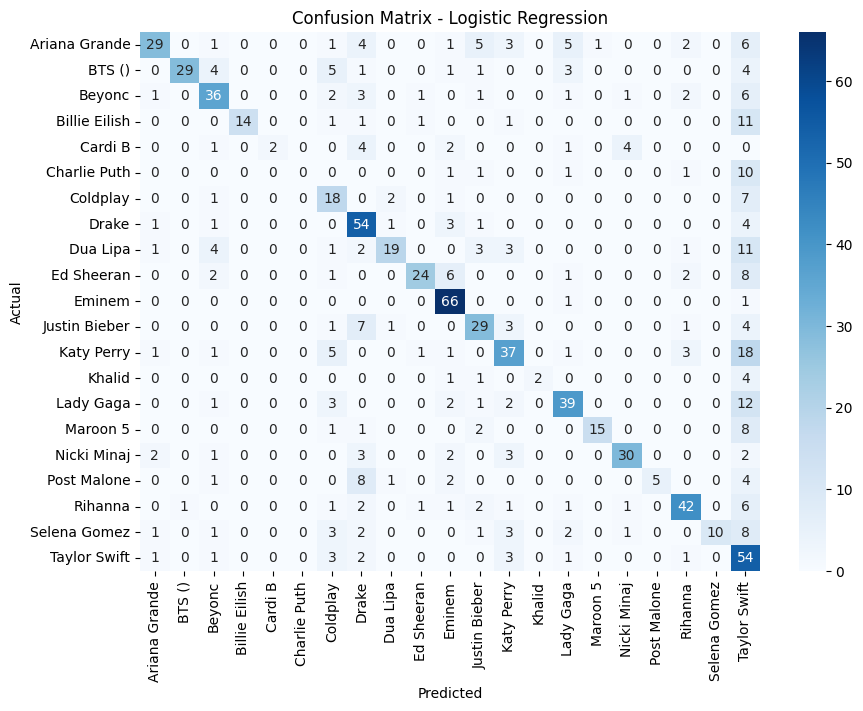

SVM - Accuracy: 0.5969, F1 Score: 0.5998
Classification Report:
                precision    recall  f1-score   support

Ariana Grande       0.60      0.50      0.55        58
       BTS ()       0.80      0.67      0.73        48
       Beyonc       0.50      0.59      0.54        54
Billie Eilish       0.94      0.52      0.67        29
      Cardi B       1.00      0.29      0.44        14
 Charlie Puth       1.00      0.07      0.13        14
     Coldplay       0.29      0.55      0.38        29
        Drake       0.75      0.72      0.73        65
     Dua Lipa       0.59      0.42      0.49        45
   Ed Sheeran       0.51      0.57      0.54        44
       Eminem       0.92      0.87      0.89        68
Justin Bieber       0.52      0.57      0.54        46
   Katy Perry       0.48      0.56      0.52        68
       Khalid       1.00      0.62      0.77         8
    Lady Gaga       0.51      0.58      0.54        60
     Maroon 5       0.48      0.56      0.52        27

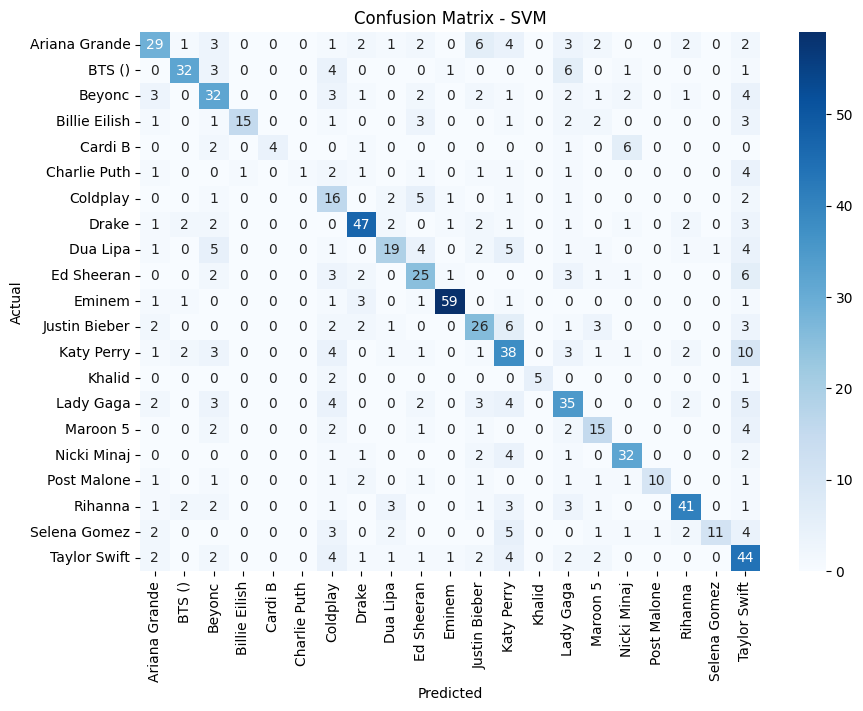

In [10]:
#### WRITE YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Naive Bayes (using Bag-of-Words from scratch)
# Predict on dev and test sets for Naive Bayes
y_dev_pred_nb = nb_classifier.predict(dev_data['Lyric'].tolist())
y_test_pred_nb = nb_classifier.predict(test_data['Lyric'].tolist())

# 2. Logistic Regression (using TF-IDF with word n-grams)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf_word, train_data['Artist'])
y_dev_pred_lr = log_reg.predict(X_dev_tfidf_word)
y_test_pred_lr = log_reg.predict(X_test_tfidf_word)

# 3. SVM (using TF-IDF with character n-grams)
svm = SVC(kernel='linear')
svm.fit(X_train_char, train_data['Artist'])
y_dev_pred_svm = svm.predict(X_dev_char)
y_test_pred_svm = svm.predict(X_test_char)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models on the test set
print("Evaluation on Test Set:")
evaluate_model(test_data['Artist'], y_test_pred_nb, "Naive Bayes")
evaluate_model(test_data['Artist'], y_test_pred_lr, "Logistic Regression")
evaluate_model(test_data['Artist'], y_test_pred_svm, "SVM")





### BONUS


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.0959 - loss: 2.9885 - val_accuracy: 0.2096 - val_loss: 2.6215
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.3337 - loss: 2.3679 - val_accuracy: 0.5641 - val_loss: 1.9554
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.6099 - loss: 1.4968 - val_accuracy: 0.6600 - val_loss: 1.5128
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.7461 - loss: 0.9734 - val_accuracy: 0.6711 - val_loss: 1.3360
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.8283 - loss: 0.6624 - val_accuracy: 0.6823 - val_loss: 1.2840
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8624 - loss: 0.5133 - val_accuracy: 0.6867 - val_loss: 1.2404
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.8933 - loss: 0.4058 - val_accuracy: 0.6968 - val_loss: 1.2729
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9109 - loss: 0.3359 - 

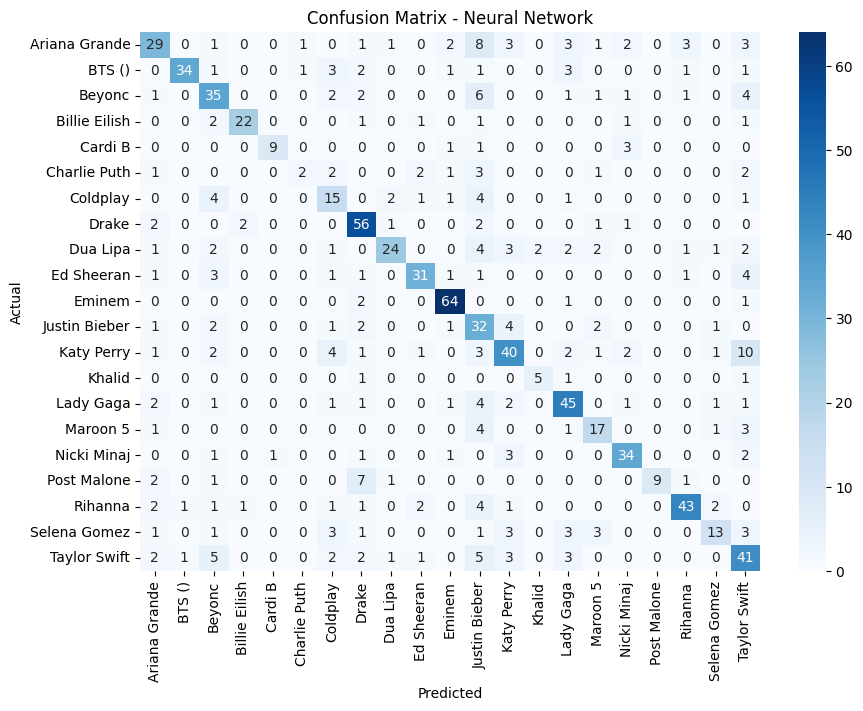

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encode target labels for neural network
label_encoder = LabelEncoder()
y_train_nn = label_encoder.fit_transform(train_data['Artist'])
y_dev_nn = label_encoder.transform(dev_data['Artist'])
y_test_nn = label_encoder.transform(test_data['Artist'])

# One-hot encode the target labels
y_train_nn = to_categorical(y_train_nn)
y_dev_nn = to_categorical(y_dev_nn)
y_test_nn = to_categorical(y_test_nn)

# Neural Network Model
model = Sequential()
model.add(Dense(128, input_shape=(X_train_tfidf_word.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_nn.shape[1], activation='softmax'))  # Output layer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
history = model.fit(X_train_tfidf_word.toarray(), y_train_nn, validation_data=(X_dev_tfidf_word.toarray(), y_dev_nn),
                    epochs=10, batch_size=32, verbose=1)

# Predict on the test set
y_test_pred_nn = model.predict(X_test_tfidf_word.toarray())
y_test_pred_nn_classes = y_test_pred_nn.argmax(axis=1)
y_test_true_classes = y_test_nn.argmax(axis=1)

# Evaluate the neural network
accuracy_nn = accuracy_score(y_test_true_classes, y_test_pred_nn_classes)
f1_nn = f1_score(y_test_true_classes, y_test_pred_nn_classes, average='weighted')
print(f"Neural Network - Accuracy: {accuracy_nn:.4f}, F1 Score: {f1_nn:.4f}")
print("Classification Report:\n", classification_report(y_test_true_classes, y_test_pred_nn_classes))

# Confusion Matrix
cm_nn = confusion_matrix(y_test_true_classes, y_test_pred_nn_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### REPORT 

This assignment involved building a machine learning pipeline to classify song lyrics by artist using multiple text processing and classification techniques. I first started with downloading the data set. Initially, the data, stored across multiple CSV files, was loaded and concatenated into a single DataFrame for uniformity. As been asked, the data was read with using the zipfile library. Before the preprocessing part, I created a histogram that shows the number of lyrics that each artist has, by using matplotlip. After than that, I implemented a data cleaning function to preprocess the lyrics. There were some non English characters in the Beyonce and BTS, so they are removed for consistency. This function also converted the text to lowercase, removed punctuation, and applied tokenization and stemming. Tokenization split the lyrics into individual words, while stemming reduced them to their root forms. Stopwords, such as "and," "the," and "of," were removed to focus on more meaningful words. These preprocessing steps helped produce cleaner, more uniform data, which in turn improved model performance by removing unnecessary variability in word forms and irrelevant characters.

I continued with implementing a Naïve bayes classifier with Bag-Of-Words features. I made multiple research for this part of the project to achieve a good code while not using external libraries like skitlearn. For feature engineering, I used two primary representations: word n-grams and character-level n-grams, each with distinct advantages. Word n-grams, which include unigrams and bigrams, capture the thematic content by focusing on specific words and short phrases. I applied TF-IDF transformation on the word n-grams to emphasize important terms by reducing the impact of frequently occurring but less informative words. Character-level n-grams, specifically bigrams and trigrams, were chosen to capture stylistic elements unique to each artist. 

In the the model training part of the project, I used three classification algorithms: Naive Bayes, Logistic Regression, and SVM, with a neural network model as a bonus classifier. Each classifier was chosen for its specific strengths in handling text data. Naive Bayes, known for its simplicity and effectiveness with word frequency data, which calculates word probabilities for each artist, using these probabilities to predict the most likely artist for a given set of lyrics. Logistic Regression was selected because it performs well with TF-IDF features and provides interpretable weights for individual words, highlighting which terms contribute most to class predictions. SVM, which works well with high-dimensional data, was used with character n-grams to capture stylistic features. Finally, as a bonus, I implemented a neural network model to explore deep learning’s potential for improving classification accuracy through nonlinear transformations and pattern recognition.

Throughout this project, I have faced with several challenges. One primary challenge was figuring out how to manage special charaters that are used in Beyonce and BTS, but came up with a very simple idea, removing the non-ASCII characters in artist names, which worked totally fine. Building the Naive Bayes classifier from scratch was another technical challenge. Which asked me to make a comprehensive research. Other than that, model training part was not an unfamiliar topic for me, since my data science and machine learning classes helped me a lot.

One significant limitation is that bag-of-words and n-gram models treat each word or character sequence independently, potentially missing contextual relationships between words. This approach limits the model’s ability to capture the deeper meanings and themes of the lyrics. Moreover, the Naive Bayes classifier’s independence assumption—treating each word’s occurrence as independent of others—may oversimplify complex lyrics where themes and phrases are contextually linked. Although the neural network model demonstrated improved performance, its training was computationally expensive and sensitive to hyperparameters, which required tuning to optimize results.

Each model's performance was evaluated using accuracy, F1 score, and confusion matrices. Naive Bayes achieved a weighted F1 score of 0.576, Logistic Regression 0.618, SVM 0.600, and the neural network 0.672, indicating its effectiveness in capturing complex patterns, albeit with higher computational demands. The confusion matrices revealed that SVM excelled with artists with unique stylistic elements, while the neural network provided more balanced and higher performance across artists.

Potential improvements include exploring deeper architectures like RNNs or transformers to capture sequential relationships, incorporating sentiment analysis or topic modeling for enhanced differentiation, and fine-tuning pre-trained language models like BERT. Additionally, hyperparameter tuning and data augmentation could further refine the models’ generalization and accuracy.
